<img src="image_1.jpg", height=200, width=200>

My task below was to go through data from the Ford Go Bike's in the Bay Area, with a focus on San Francisco, and give recommendations after performing data analysis. I have summarized the recommendations up top for convenience.

### Recommendation Summary

#### Addressing Bike Shortages at Busiest Start Stations During Peak Commute Hours:
1) Use targeted incentives to make people who commute on Caltrain (4th and King) down the Peninsula each morning to use bikes in the morning to reach the station.  This is the busiest station and creating traffic in the reverse direction from the common commute will help the system replenish bike availability at this station.  We recommend it is piloted for this bike station before being used on others. Incentives could include a discount off of subscriptions after a certain number of trips ending at the desired station during the morning commute hours.

2) Build more stations nearby or extend the capacty of the 5 busiest stations where possible.  This approach would require additional permits as well as necessary capacity on the roadside.

3) Increase the number of trucks carrying bikes back from destination stations to replenish bikes at busy morning stations.  This approach would have the highest operating cost.

4) Charge a premium when there are few bikes left at the 4th and King station. This way, those who don't wish to pay the premium will walk to a nearby station to ride a bike.  This is not an ideal approach as it carries the risk of detering current customers from continuing use of the system due to bad faith generated by added fees.

#### Promoting Ridership on Weekends
5) Explore methods to boost Subscriber ridership on weekends, such as getting people to use the bikeshare for errands like groceries or weekend shopping. This can be accomplished through incentives such as small grocery or shopping discounts for those who commute on a weekend using the Ford Go bikes.

6) Extend weekend time usage to 60 minutes.  This will allow tourists and more casual users to take time to ride further on Weekends, which we think may happened if allowed for free since people have time on Weekends.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

We will begin our analysis by reviewing bike usage on a monthly basis from inception through August 2016.  We will then look at daily bike usage on weekdays and weekends.


Waiting on bqjob_r5f556da9_00000166657a9ea0_1 ... (0s) Current status: DONE   


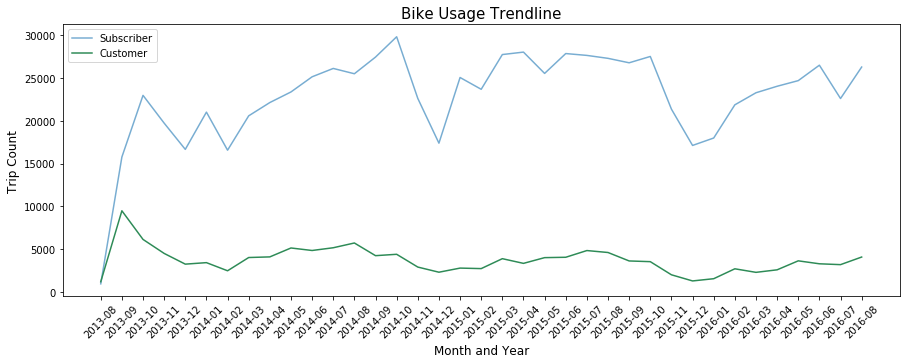

In [2]:
## Line graph grouped by months showing growth of customer and subscriber usage over time
! bq query --use_legacy_sql=FALSE --format=csv " \
SELECT EXTRACT(year FROM start_date) AS year, \
EXTRACT(month FROM start_date) as month, \
subscriber_type, COUNT(trip_id) AS counter \
FROM `bigquery-public-data.san_francisco.bikeshare_trips` \
GROUP BY year, month, subscriber_type \
ORDER BY year, month, subscriber_type " > year_trend.csv
df = pd.read_csv('year_trend.csv')
df["month"] = df.month.map("{:02}".format)
df['yyyymm'] = df['year'].map(str)+'-'+df['month'].map(str)

## Plotting section
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(df[df['subscriber_type'] == "Subscriber"]['yyyymm'], \
         df[df['subscriber_type'] == "Subscriber"]['counter'],alpha=.6)
plt.plot(df[df['subscriber_type'] == "Customer"]['yyyymm'], \
         df[df['subscriber_type'] == "Customer"]['counter'], \
         color='seagreen')

plt.xlabel("Month and Year", fontsize=12)
plt.ylabel("Trip Count", fontsize=12)
plt.title('Bike Usage Trendline', fontsize = 15)
plt.legend(["Subscriber","Customer"], loc = 2)
plt.xticks(rotation=45)
plt.show()

From the above, we can observe a few things:
- After the initial spike in the first 2 months, ridership has remained fairly constant through August 2016.
- There are slight dips each winter.
- The number of Subscriber rides are consistently far above the number of single use Customers each month.

Next, we will look at Bike Usage throughout the day from 12:00am to 11:59pm split by weekday and weekend usage.


Waiting on bqjob_r1e4f28b1_00000166657abc61_1 ... (0s) Current status: DONE   


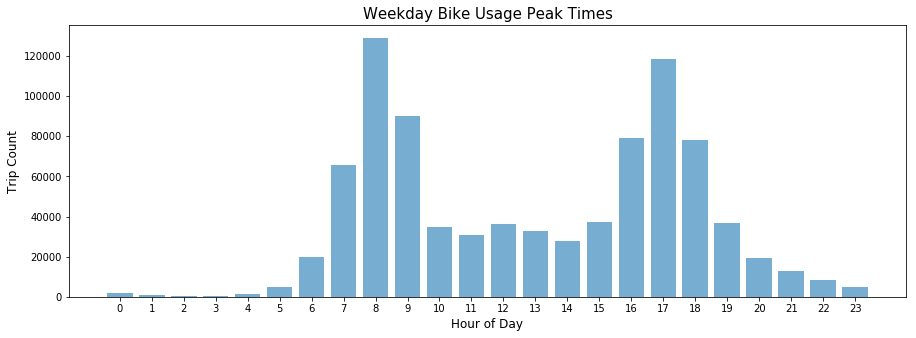


Waiting on bqjob_r65878562_00000166657ad567_1 ... (0s) Current status: DONE   


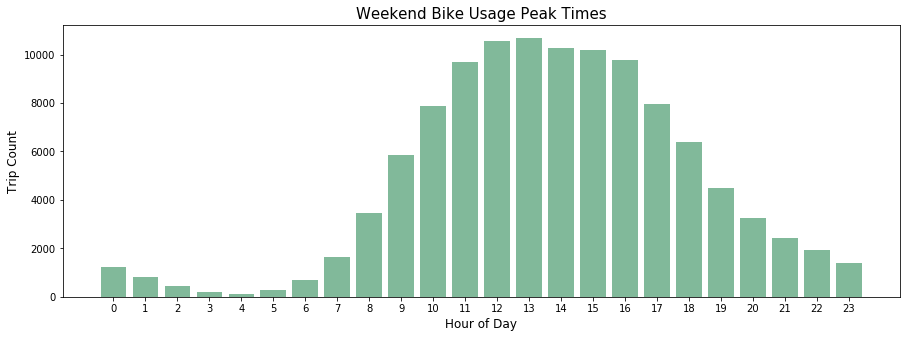

In [3]:
! bq query --use_legacy_sql=FALSE --format=csv "\
SELECT EXTRACT(hour FROM start_date) AS hour, COUNT(trip_id) AS counter \
FROM `bigquery-public-data.san_francisco.bikeshare_trips` \
WHERE EXTRACT (dayofweek FROM start_date) BETWEEN 2 AND 6 \
GROUP BY hour \
ORDER BY hour" \
> result.csv
df_wkday = pd.read_csv('result.csv')

fig, ax = plt.subplots(figsize=(15,5))
plt.bar(df_wkday['hour'], df_wkday['counter'], alpha = .6)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Trip Count", fontsize=12)
plt.title('Weekday Bike Usage Peak Times', fontsize = 15)
plt.xticks((df_wkday['hour']))
plt.show()

! bq query --use_legacy_sql=FALSE --format=csv "\
SELECT EXTRACT(hour FROM start_date) AS hour, COUNT(trip_id) AS counter \
FROM `bigquery-public-data.san_francisco.bikeshare_trips` \
WHERE EXTRACT (dayofweek FROM start_date) IN (1,7) \
GROUP BY hour \
ORDER BY hour" \
> result.csv
df_wknd = pd.read_csv('result.csv')

fig, ax = plt.subplots(figsize=(15,5))
plt.bar(df_wknd['hour'], df_wknd['counter'],  color = 'seagreen', alpha = .6)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Trip Count", fontsize=12)
plt.title('Weekend Bike Usage Peak Times', fontsize = 15)
plt.xticks((df_wknd['hour']))
plt.show()

#### Weekdays
We see above that weekday usage peaks each morning and evening during regular commute times, with the busiest times from 7:00am - 9:59am and 4:00pm - 6:59pm.

#### Weekends
The weekend daily trend differs significantly from the weekday trend.  Bike use peaks in the early afternoon time (12:00pm - 3:59pm).  Also note that the peak usage (10,000 Trips) is far lower than weekday peak usage (120,000).

These graphs prompts us to focus on boosting weekend usage of the Ford bike share system. The thought is that since weekend usage is far below that of weekdays, an increase in ridership on weekends will still have usage below the system's capacity, generating more revenue while avoiding an increase in the weekly operating costs.

In [4]:
### Most popular start and end stations
! bq query --use_legacy_sql=FALSE --format=csv "\
SELECT start_station_name, start_station_id, count(start_station_id) AS Trips \
FROM `bigquery-public-data.san_francisco.bikeshare_trips` \
GROUP BY start_station_name, start_station_id \
ORDER BY Trips DESC" > stations_start.csv
stations_start = pd.read_csv('stations_start.csv')

! bq query --use_legacy_sql=FALSE --format=csv "\
SELECT end_station_name, end_station_id, count(end_station_id) AS Trips \
FROM `bigquery-public-data.san_francisco.bikeshare_trips` \
GROUP BY end_station_name, end_station_id \
ORDER BY Trips DESC" > stations_end.csv
stations_end = pd.read_csv('stations_end.csv')

display(stations_start.head(10))


Waiting on bqjob_r7a210eb0_00000166657aec54_1 ... (0s) Current status: DONE   

Waiting on bqjob_r3450ad1e_00000166657b00e5_1 ... (0s) Current status: DONE   


,start_station_name,start_station_id,Trips
0,San Francisco Caltrain (Townsend at 4th),70,72683
1,San Francisco Caltrain 2 (330 Townsend),69,56100
2,Harry Bridges Plaza (Ferry Building),50,49062
3,Embarcadero at Sansome,60,41137
4,2nd at Townsend,61,39936
5,Temporary Transbay Terminal (Howard at Beale),55,39200
6,Steuart at Market,74,38531
7,Market at Sansome,77,35142
8,Townsend at 7th,65,34894
9,Market at 10th,67,30209


We have displayed the 10 busiest stations above based on start station.  We will examine which bike stations are busiest during the morning commute hours, 7:00am - 9:59pm in our analysis below. 

Then, I will examine the busiest stations to see how many bikes they have remaining during peak hours.

In [5]:
###Specifying usership to the morning time, need to add evening equivalent
! bq query --use_legacy_sql=FALSE --format=csv "\
SELECT start_station_name, start_station_id, COUNT(start_station_id) AS Trips \
FROM `bigquery-public-data.san_francisco.bikeshare_trips` \
WHERE EXTRACT(hour FROM start_date) IN (7, 8, 9) \
GROUP BY start_station_name, start_station_id \
ORDER BY Trips DESC \
LIMIT 6" > morning_volume.csv
morning_volume = pd.read_csv('morning_volume.csv')

display(morning_volume.head())


Waiting on bqjob_r3f6641e1_00000166657b14a4_1 ... (0s) Current status: DONE   


,start_station_name,start_station_id,Trips
0,San Francisco Caltrain (Townsend at 4th),70,39310
1,San Francisco Caltrain 2 (330 Townsend),69,30843
2,Harry Bridges Plaza (Ferry Building),50,20747
3,Temporary Transbay Terminal (Howard at Beale),55,19264
4,Steuart at Market,74,15166


Note that stations which are busiest during the morning commute time are all a part of the 10 busiest start stations overall.


Waiting on bqjob_r523ab3f4_00000166657b2aa9_1 ... (0s) Current status: DONE   


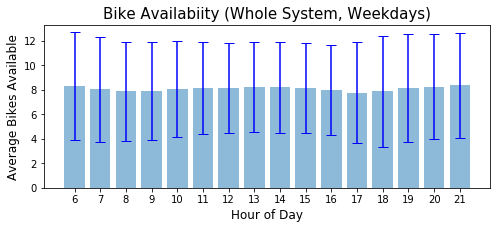


Waiting on bqjob_r7088c643_00000166657b3f53_1 ... (0s) Current status: DONE   


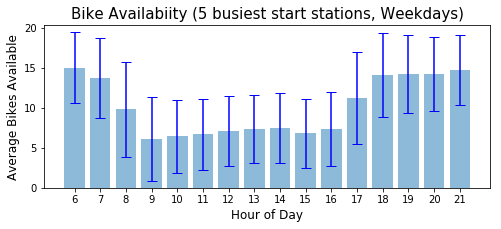

In [6]:
#Graph showing bikes available at these stations per hour on weekdays
! bq query --use_legacy_sql=FALSE --format=csv "\
SELECT EXTRACT(hour FROM time) AS hour, \
AVG(bikes_available) AS avg_bk_avail, STDDEV(bikes_available) AS std_bk_avail \
FROM `bigquery-public-data.san_francisco.bikeshare_status` \
WHERE EXTRACT(hour FROM time) BETWEEN 6 AND 21 \
AND EXTRACT(dayofweek FROM time) BETWEEN 2 AND 6 \
GROUP BY EXTRACT(hour FROM time)" > system_result.csv
df_system = pd.read_csv('system_result.csv')
df_system = df_system.sort_values(by=['hour'])

fig, ax = plt.subplots(figsize=(8,3))
plt.bar(df_system['hour'], df_system['avg_bk_avail'], \
        yerr=df_system['std_bk_avail'], ecolor='blue', alpha=.5, capsize=5)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Average Bikes Available", fontsize=12)
plt.title('Bike Availabiity (Whole System, Weekdays)', fontsize = 15)
plt.xticks((df_system['hour']))

plt.show()

#Graph showing bikes available at busiest 5 stations per hour on weekdays
! bq query --use_legacy_sql=FALSE --format=csv "\
SELECT EXTRACT(hour FROM time) AS hour, \
AVG(bikes_available) AS avg_bk_avail, STDDEV(bikes_available) AS std_bk_avail \
FROM `bigquery-public-data.san_francisco.bikeshare_status` \
WHERE station_id IN (50, 55, 69, 70, 74) \
AND EXTRACT (hour FROM time) BETWEEN 6 AND 21 \
AND EXTRACT (dayofweek FROM time) BETWEEN 2 AND 6 \
GROUP BY extract(hour FROM time)" > result.csv
df = pd.read_csv('result.csv')
df = df.sort_values(by=['hour'])

fig, ax = plt.subplots(figsize=(8,3))
plt.bar(df['hour'], df['avg_bk_avail'], \
        yerr=df['std_bk_avail'], ecolor = 'blue', alpha = .5, capsize=5)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Average Bikes Available", fontsize=12)
plt.title('Bike Availabiity (5 busiest start stations, Weekdays)', fontsize = 15)
plt.xticks((df['hour']))

plt.show()

The top graph above shows us that systemwide, there is an abundance of available bicycles. Looking at the lower graph, we see that the 5 busiest stations have a bike shortage from 9:00am to 4:00pm on weekdays.  We see that at the most used morning commute stations there are at times very few bikes available, with the blue error bars showing the variance just 1 standard deviation away.

Our recommendation is to find a way to restock the busiest morning station so that bikes are always available:

1) Use targeted incentives to make people who commute on Caltrain (4th and King) down the Peninsula each morning to use bikes in the morning to reach the station.  This is the busiest station and creating traffic in the reverse direction from the common commute will help the system replenish bike availability at this station.  We recommend it is piloted for this bike station before being used on others. Incentives could include a discount off of subscriptions after a certain number of trips ending at the desired station during the morning commute hours.

2) Build more stations nearby or extend the capacty of the 5 busiest stations where possible.  This approach would require additional permits as well as necessary capacity on the roadside.

3) Increase the number of trucks carrying bikes back from destination stations to replenish bikes at busy morning stations.  This approach would have the highest operating cost.

4) Charge a premium when there are few bikes left at the 4th and King station. This way, those who don't wish to pay the premium will walk to a nearby station to ride a bike.  This is not an ideal approach as it carries the risk of detering current customers from continuing use of the system due to bad faith generated by added fees.

Next, we will examine weekend usage, starting by examining Subscriber vs Customer numbers.  Subscribers are defined as riders who pay for a multi-day to year-long subscripton and Customers are those that buy single-day passes.

In [7]:
#Subs vs Cust, Weekdays vs Weekends
! bq query --use_legacy_sql=FALSE --format=csv "\
SELECT subscriber_type AS Subscriber_Type, count(trip_id) AS Trips, \
  CASE  WHEN EXTRACT(dayofweek FROM start_date) IN (1,7) THEN 'Weekend' \
        WHEN EXTRACT(dayofweek FROM start_date) BETWEEN 2 AND 6 THEN 'Weekday' \
        ELSE NULL END AS Day_Type \
FROM `bigquery-public-data.san_francisco.bikeshare_trips` \
GROUP BY Subscriber_Type, Day_Type\
 " > subsvscust_total.csv 
df0 = pd.read_csv('subsvscust_total.csv')


Waiting on bqjob_r49bc793f_00000166657b5433_1 ... (0s) Current status: DONE   


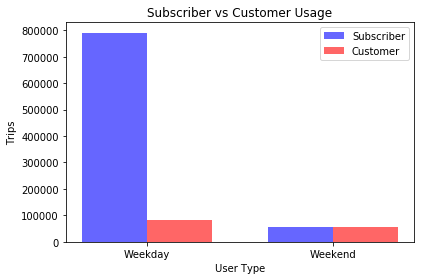

In [8]:
#Extract total number of trips at the levels of Subs vs Cust and Wkday vs Wknd
wkday_sub = df0['Trips'][df0['Subscriber_Type']=='Subscriber']\
    [df0['Day_Type']=='Weekday'].sum()
wkday_cust = df0['Trips'][df0['Subscriber_Type']=='Customer']\
    [df0['Day_Type']=='Weekday'].sum()

wknd_sub = df0['Trips'][df0['Subscriber_Type']=='Subscriber']\
    [df0['Day_Type']=='Weekend'].sum()
wknd_cust = df0['Trips'][df0['Subscriber_Type']=='Customer']\
    [df0['Day_Type']=='Weekend'].sum()

n_groups = 2

subscribers = (wkday_sub, wknd_sub)
customers = (wkday_cust, wknd_cust)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.6

rects1 = ax.bar(index, subscribers, bar_width,
                alpha=opacity, color='blue',
                label='Subscriber')

rects2 = ax.bar(index + bar_width, customers, bar_width,
                alpha=opacity, color='red',
                label='Customer')

ax.set_xlabel('User Type')
ax.set_ylabel('Trips')
ax.set_title('Subscriber vs Customer Usage')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Weekday', 'Weekend'))
ax.legend()

fig.tight_layout()
plt.show()

In [9]:
d = {'':['Subscriber', 'Customer'], \
     'Weekdays': ["{:,}".format(wkday_sub), "{:,}".format(wkday_cust)], \
     'Weekends': ["{:,}".format(wknd_sub), "{:,}".format(wknd_cust)]}
df = pd.DataFrame(data=d)
df = df.set_index('')
df    

,Weekdays,Weekends
,,
Subscriber,"790,337","56,502"
Customer,"81,657","55,152"


There are far more Subscribers than Customers on weekdays, while on weekends Customer and Subscriber trips . We recommend:

5) Explore methods to boost Subscriber ridership on weekends, such as getting people to use the bikeshare for errands like groceries or weekend shopping. This can be accomplished through incentives such as small grocery or shopping discounts for those who commute on a weekend using the Ford Go bikes.

We will now compare the difference in trip duration between weekday and weekend trips.

In [10]:
# Histograms of trip length on Weekdays vs Weekends
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=10000000 "\
SELECT duration_sec/60 AS minutes \
FROM `bigquery-public-data.san_francisco.bikeshare_trips` \
WHERE EXTRACT(dayofweek from start_date) IN (2,3,4,5,6)" > trip_dur_weekday.csv 
df_weekday = pd.read_csv('trip_dur_weekday.csv')

! bq query --use_legacy_sql=FALSE --format=csv --max_rows=10000000 "\
SELECT duration_sec/60 AS minutes \
FROM `bigquery-public-data.san_francisco.bikeshare_trips` \
WHERE EXTRACT(dayofweek from start_date) IN (1,7)" > trip_dur_weekend.csv 
df_weekend = pd.read_csv('trip_dur_weekend.csv')


Waiting on bqjob_r5f0b5023_00000166657b680e_1 ... (0s) Current status: RUNNING
                                                                              
Waiting on bqjob_r5f0b5023_00000166657b680e_1 ... (1s) Current status: RUNNING
                                                                              
Waiting on bqjob_r5f0b5023_00000166657b680e_1 ... (2s) Current status: RUNNING
                                                                              
Waiting on bqjob_r5f0b5023_00000166657b680e_1 ... (2s) Current status: DONE   

Waiting on bqjob_r3698b2c6_00000166657c3d15_1 ... (0s) Current status: RUNNING
                                                                              
Waiting on bqjob_r3698b2c6_00000166657c3d15_1 ... (1s) Current status: RUNNING
                                                                              
Waiting on bqjob_r3698b2c6_00000166657c3d15_1 ... (1s) Current status: DONE   


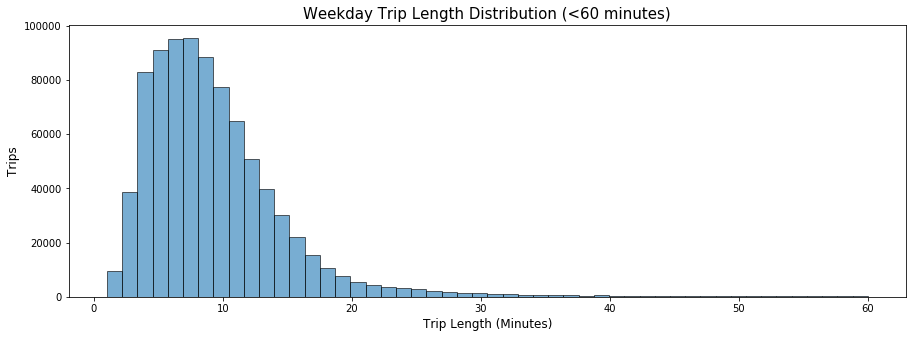

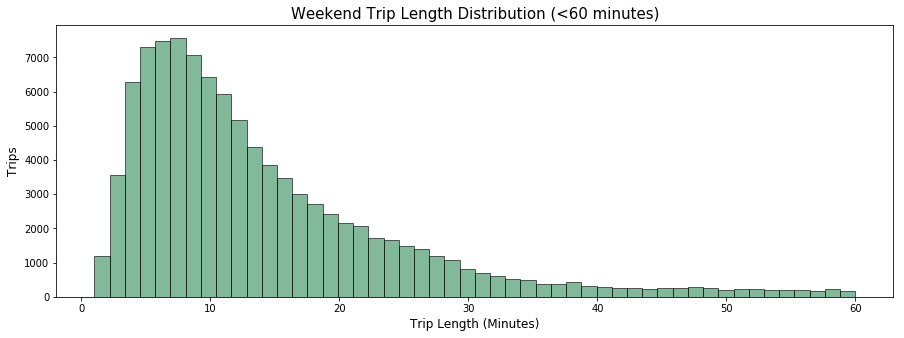

In [11]:
df_weekday_first_hour = df_weekday[df_weekday['minutes'] < 60]
fig, ax = plt.subplots(figsize=(15,5))
plt.hist(df_weekday_first_hour['minutes'], \
         bins = 50, edgecolor='black', alpha=.6)
plt.xlabel("Trip Length (Minutes)", fontsize=12)
plt.ylabel("Trips", fontsize=12)
plt.title('Weekday Trip Length Distribution (<60 minutes)', fontsize = 15)
plt.show()

df_weekend_first_hour = df_weekend[df_weekend['minutes'] < 60]
fig, ax = plt.subplots(figsize=(15,5))
plt.hist(df_weekend_first_hour['minutes'], \
         bins = 50,color='seagreen', edgecolor='black',alpha=.6)
plt.xlabel("Trip Length (Minutes)", fontsize=12)
plt.ylabel("Trips", fontsize=12)
plt.title('Weekend Trip Length Distribution (<60 minutes)', fontsize = 15)
plt.show()

We see that most weekday trips are completed in under 20 minutes, while a decent portion of weekend trips exceed 20 minutes. 

6) Extend weekend time usage to 60 minutes.  This will allow tourists and more casual users to take time to ride further on weekends.  This would not be easily possible on weekdays since weekday usage is far higher and relies on quick turnover of bicycle use during morning and evening commute times. On the weekend, since systemwide usage is relatively low, we don't think this extension will cause a bike shortage at any station. 
